<a href="https://colab.research.google.com/github/mohammad-ashraf-abdin/NLP_mid_training/blob/main/Last_Test_Ashraf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
# nltk.download()
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('words')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
from pandas.core.common import flatten
import re
import nltk
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import words
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.collocations import *
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TreebankWordTokenizer
from sklearn.linear_model import LogisticRegression
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import wordnet
from sklearn.model_selection import train_test_split


In [ ]:
tk = WhitespaceTokenizer()
wn=nltk.WordNetLemmatizer()
stop = nltk.corpus.stopwords.words('english')

Read Data From Github

In [ ]:
url = 'https://raw.githubusercontent.com/ashraf97it/NLPHW2/main/Covid_19_tweets_train.csv'
df = pd.read_csv(url,encoding='latin1')
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


**Data Preproccenig :**

1.   Clean from links
2.   Clean from pic
3.   Clean from decontacted ( قمت بإضافة الرمز الاحمر بدل الفاصلة بسبب الترميز اللاتيني للغة )
4. Clean from emoji
5. Clean from symbol
6. Clean from username
7. Clean from spacing punctuation
8. Turn text to lower case
9. Remove extra spaces 10- ملاحظة لم اقم بإزالة الارقام بسبب اهمية رقم 19 بالنسبة لموضوعنا

In [ ]:
def removeLink(text):
    pattern=re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+])+')
    text= pattern.sub("",text)
    return text   

In [ ]:
def removePic(text):
    pattern=re.compile('pic.twitter.com/([a-zA-Z]|[0-9])*')
    text=pattern.sub("",text)
    return text

In [ ]:
def removeDecontracted(text):
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"won\t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"can\t", "can not", text)
    text = re.sub(r"won\’t", "will not", text)
    text = re.sub(r"won\t", "will not", text)
    text = re.sub(r"can\’t", "can not", text)
    text = re.sub(r"can\t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"nt", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"m", " am", text)
    return text


In [ ]:
def removeEmojies(text):
    pattern=re.compile("["
                u"\U0001F600-\U0001F64F"u"\U0001F300-\U0001F5FF"u"\U0001F680-\U0001F6FF"u"\U0001F1E0-\U0001F1FF" 
                u"\U00002702-\U000027B0"u"\U000024C2-\U0001F251"u"\U0001f926-\U0001f937"u'\U00010000-\U0010ffff'
                u"\u200d"u"\u2640-\u2642"u"\u2600-\u2B55"u"\u23cf"u"\u23e9"u"\u231a"u"\u3030"u"\ufe0f"
    "]+", flags=re.UNICODE)
    text=pattern.sub("",text)
    return text

In [ ]:
def removeSymbols(text):
    pattern = re.compile("[/{}()\[\]\|,;:؟?!،\"*.…”؛]")
    text= re.sub(pattern,"",text)
    return text

In [ ]:
def removeUserName(text):
    pattern=re.compile('@(_)*([a-zA-Z0-9])+')
    text=pattern.sub("",text)
    return text

In [ ]:
extra_punct = [
    ',', '.', '"', ':', ')', '(', '!', '?', '|', ';', "'", '$', '&',
    '/', '[', ']', '>', '%', '=', '*', '+', '\\', '•',  '~', '@', '£',
    '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',
    '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '“', '★', '”',
    '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾',
    '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '▒', '：', '¼', '⊕', '▼',
    '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲',
    'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»',
    '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø',
    '¹', '≤', '‡', '√', '«', '»', '´', 'º', '¾', '¡', '§', '£', '₤']
def spacing_punctuation(text):
    for punc in extra_punct:
        if punc in text:
            text = text.replace(punc, f'')
    return text

In [ ]:
def remooo(text):
    text = text.lower()
    text = text.strip()
    return text
    

Call all clean functions in one function

In [ ]:
def text_clean(text):
  nitem = removeLink(text)
  nitem = removePic(nitem)
  nitem = removeDecontracted(nitem)
  nitem = removeEmojies(nitem)
  nitem = removeSymbols(nitem)
  nitem = removeUserName(nitem)
  nitem = spacing_punctuation(nitem)
  nitem = remooo(nitem)
  return nitem

In [ ]:
def toknize(text):
    text=tk.tokenize(text) 
    return text

In [ ]:
def lemmatize_text(text):
    text=[wn.lemmatize(word) for word in text]
    return text


In [ ]:
def remove_stop(text):
    text_clean=[word for word in text if word not in stop]
    return text_clean

In [ ]:
def listtostring(text):
    listToStr = ' '.join(map(str, text)) 
    return listToStr

remove # symbol 

In [ ]:
def remove_hashtags(text):
    pattern = re.compile("#")
    text= re.sub(pattern,"",text)
    pattern = re.compile("-")
    text= re.sub(pattern," ",text)
    pattern = re.compile("_")
    text= re.sub(pattern," ",text)
    return text

remove hastag sentains 

In [ ]:
def remove_fullhashtags(text):
    pattern = re.compile('#(_)*([a-zA-Z0-9])+')
    text= re.sub(pattern,"",text)
    return text

apply all clean and prepare function in our data 


In [ ]:
df['OriginalTweet']=df.OriginalTweet.apply(text_clean)
df['normlize_tweet']=df.OriginalTweet.apply(toknize)
df['normlize_tweet']=df.normlize_tweet.apply(lambda x: remove_stop(x))
df['normlize_tweet']=df.normlize_tweet.apply(lambda x: lemmatize_text(x))
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,normlize_tweet
0,3799,48751,London,16-03-2020,gahan and and,Neutral,[gahan]
1,3800,48752,UK,16-03-2020,advice talk to your neighbours family to excha...,Positive,"[advice, talk, neighbour, family, exchange, ph..."
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworths to give elder...,Positive,"[coronavirus, australia, woolworth, give, elde..."
3,3802,48754,NaN,16-03-2020,my food stock is not the only one which is emp...,Positive,"[food, stock, one, empty, please, panic, enoug..."
4,3803,48755,NaN,16-03-2020,me ready to go at supermarket during the #covi...,Extremely Negative,"[ready, go, supermarket, #covid19, outbreak, p..."


In [ ]:
Tweets = df['normlize_tweet']
Lemma=list(flatten(Tweets))
fdistWithNoStop = nltk.FreqDist(w for w in Lemma)
print("most common words :")
print(fdistWithNoStop.most_common(10))
least_common = [item for item in Counter(Lemma).most_common()[:-11:-1]]
print("__________________")
print("uncommon words")
print(least_common)
WORD= set(words.words())
english_vocab=[]
for n in Lemma:
    if n not in WORD:
        english_vocab.append(n)
print("__________________")
print("Misspelled words")
print(english_vocab[:10])


most common words :
[('#coronavirus', 15880), ('#covid19', 8843), ('price', 8812), ('store', 8089), ('covid-19', 7495), ('supermarket', 7227), ('food', 6910), ('grocery', 6477), ('people', 5564), ('amp', 4957)]
__________________
uncommon words
[('whethe', 1), ('rift', 1), ('newused', 1), ('martinsville', 1), ('rejecting', 1), ('rs46215', 1), ('172220', 1), ('171525ounce', 1), ('#safe-haven', 1), ('sv', 1)]
__________________
Misspelled words
['gahan', 'neighbour', 'neighbour', 'gp', 'online', 'med', 'coronavirus', 'australia', 'woolworth', 'dedicated']


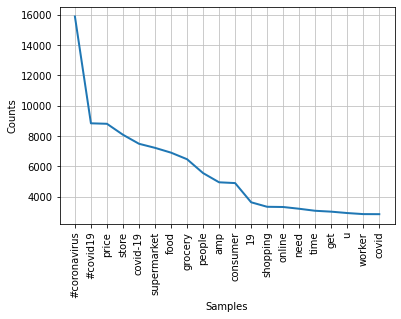

In [ ]:
fdistWithNoStop.plot(20)
plt.draw()
%matplotlib inline
plt.show(block=True)

In [ ]:
def Collocations(tokens):
    
    stopwords = nltk.corpus.stopwords.words("english")
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    Bigram = BigramCollocationFinder.from_words(tokens, window_size = 2)
    Bigram.apply_word_filter(lambda w: len(w) < 3 or w in stopwords)
    Bigram.apply_freq_filter(3) 
    res = Bigram.nbest(bigram_measures.likelihood_ratio, 20)
    return res 
Collocations(Lemma)   

[('grocery', 'store'),
 ('toilet', 'paper'),
 ('hand', 'sanitizer'),
 ('panic', 'buying'),
 ('online', 'shopping'),
 ('social', 'distancing'),
 ('oil', 'price'),
 ('#coronavirus', '#covid19'),
 ('#covid19', '#coronavirus'),
 ('supply', 'chain'),
 ('stay', 'home'),
 ('food', 'bank'),
 ('covid-19', 'pandemic'),
 ('front', 'line'),
 ('stay', 'safe'),
 ('face', 'mask'),
 ('gas', 'price'),
 ('supermarket', 'shelf'),
 ('consumer', 'behavior'),
 ('wash', 'hand')]

In [ ]:
tweets=df['normlize_tweet'].apply(listtostring)
import re
haash=[]
# hashTag=open("nicerText.txt","r",encoding='latin1')

# lines=Tweets.readlines()
for line in tweets:
    tag=re.search(r'#[0-9a-zA-Z0-9]+((_)?[0-9a-zA-Z0-9]+)*',line)
    if tag:
        tag=re.search(r'#[0-9a-zA-Z0-9]+((_)?[0-9a-zA-Z0-9]+)*',line).group()
        haash.append(tag)
HashTagF = [item for item in Counter(haash).most_common(10)]
print(HashTagF)

[('#coronavirus', 7728), ('#covid19', 3081), ('#covid2019', 838), ('#toiletpaper', 459), ('#socialdistancing', 368), ('#coronacrisis', 365), ('#covid', 275), ('#stayhomesavelives', 161), ('#supermarket', 113), ('#retail', 108)]


[('london', 575), ('united states', 532), ('london england', 527), ('washington dc', 498), ('new york ny', 400), ('united kingdom', 347), ('', 311), ('india', 300), ('los angeles ca', 287), ('usa', 269), ('uk', 265), ('australia', 237), ('canada', 210), ('england united kingdom', 194), ('global', 170), ('toronto ontario', 164), ('chicago il', 160), ('san francisco ca', 155), ('boston ma', 154), ('california usa', 154)]


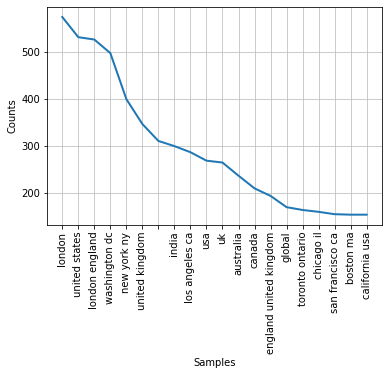

In [ ]:
loc = list(df['Location'])
all_loc = []
for item in loc:
    if type(item) == type(loc[1]):
        nitem = text_clean(item)
   
        all_loc.append(nitem)
freq_loc= []
for x in all_loc:
    freq_loc.append(x)
fdistWithStop=nltk.FreqDist(w for w in freq_loc)
print(fdistWithStop.most_common(20))
fdistWithStop.plot(20)
plt.draw()
%matplotlib inline
plt.show(block=True)

SECOND Part Of Home Work


In [ ]:
!pip install 'nltk==3.4.5'

     |████████████████████████████████| 1.5MB 5.3MB/s 
  Created wheel for nltk: filename=nltk-3.4.5-cp36-none-any.whl size=1449906 sha256=bc869c1903804a600e85dc8d86231b370fdaf986b487eb9bcf3127ca1ab765be
  Stored in directory: /root/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


use university way that used in lab to generate language 

In [ ]:
from nltk.lm.preprocessing import padded_everygram_pipeline
trump_corpus = list(tweets.apply(word_tokenize))
n = 3
train_data, padded_sents = padded_everygram_pipeline(n, trump_corpus)


In [ ]:
from nltk.lm import MLE
trump_model = MLE(n) # Lets train a 3-grams model, previously we set n=3
trump_model.fit(train_data, padded_sents)

In [ ]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

detokenize = TreebankWordDetokenizer().detokenize

def generate_sent(model, num_words, random_seed=42):
    content = []
    for token in model.generate(num_words, random_seed=random_seed):
        if token == '<s>':
            continue
        if token == '</s>':
            break
        content.append(token)
    return detokenize(content)

In [ ]:
generate_sent(trump_model, num_words=50, random_seed=7)

'birdbox #staysafestayhome #lockdown #catsofthequarantine #cats #cat #coronavirus isle wight lot fish amp produce good supply chain stretched coronavirus pandemic #covid-19 pandemic'

end 1 of 2


cleaning reasult function 

In [ ]:
def cleaning_result(_list):
  temp = []
  for string in _list:
    st=text_clean(string)
    st=toknize(st)
    st=lemmatize_text(st)
    st=listtostring(st)
    temp.append(st)
  return temp

In [ ]:
print(cleaning_result(["hello!!?" , "hi! I am using whatsapp."]))

['hello', 'hi i am using whatsapp']


Import all library needed in test phase


In [ ]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from keras.layers import Flatten
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from keras.layers import Embedding, LSTM, Dense
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers.convolutional import Conv1D 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import TimeDistributed
from keras.layers import Bidirectional 
from keras.layers import SpatialDropout1D
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers.convolutional import Conv1D 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
import pickle
from tensorflow import keras

This function convert sentiment from string to binary number 

In [ ]:
def binray(text):
    if text == "Extremely Negative":
        text = 1
    if text == "Negative":
        text = 1      
    if text == "Extremely Positive":
        text = 0
    if text == "Positive":
        text = 0
    return text


Call Splite Function

In [ ]:
def split(first,second):
    _tweet = first.values
    _senti = second.values
    return train_test_split(_tweet, _senti, test_size=0.25, random_state=1000)
    # return sentences_train, sentences_test, y_train, y_test

In [ ]:
le=LabelEncoder()
df["nSentiment"]=df["Sentiment"]
df["nSentiment"]=le.fit_transform(df["nSentiment"])
display(df["nSentiment"].head())
nSentiment=df["nSentiment"]
tweets=df.normlize_tweet.apply(listtostring)
df.head()

0    3
1    4
2    4
3    4
4    0
Name: nSentiment, dtype: int64

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,normlize_tweet,nSentiment
0,3799,48751,London,16-03-2020,gahan and and,Neutral,[gahan],3
1,3800,48752,UK,16-03-2020,advice talk to your neighbours family to excha...,Positive,"[advice, talk, neighbour, family, exchange, ph...",4
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworths to give elder...,Positive,"[coronavirus, australia, woolworth, give, elde...",4
3,3802,48754,NaN,16-03-2020,my food stock is not the only one which is emp...,Positive,"[food, stock, one, empty, please, panic, enoug...",4
4,3803,48755,NaN,16-03-2020,me ready to go at supermarket during the #covi...,Extremely Negative,"[ready, go, supermarket, #covid19, outbreak, p...",0


1. Drop natural sentiment 
2. Turn data to binary data
3. convert list to string 

In [ ]:
df.drop(df.index[(df["Sentiment"] == "Neutral")],axis=0,inplace=True)
df['binray_Sentiment']=df.Sentiment.apply(binray)
binray_Sentiment=df['binray_Sentiment']
df['normlize_tweet']=df.normlize_tweet.apply(listtostring)
normlize_tweet=df['normlize_tweet']
df.head()


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,normlize_tweet,nSentiment,binray_Sentiment
1,3800,48752,UK,16-03-2020,advice talk to your neighbours family to excha...,Positive,advice talk neighbour family exchange phone nu...,4,0
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworths to give elder...,Positive,coronavirus australia woolworth give elderly d...,4,0
3,3802,48754,NaN,16-03-2020,my food stock is not the only one which is emp...,Positive,food stock one empty please panic enough food ...,4,0
4,3803,48755,NaN,16-03-2020,me ready to go at supermarket during the #covi...,Extremely Negative,ready go supermarket #covid19 outbreak paranoi...,0,1
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,as news of the region is first confirmed covid...,Positive,news region first confirmed covid-19 case came...,4,0


Bag of word features

In [ ]:
def bow_features(X_train, X_test):
    vectorizer = CountVectorizer()
    vectorizer.fit(sentences_train)
    X_train = vectorizer.transform(X_train)
    X_test  = vectorizer.transform(X_test)
    return X_train, X_test

Bag of word classifire 

In [ ]:
def classifierbow(X_train,y_train,y_test,X_test):
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    return score

tfidf features

In [ ]:
def tfidf_features(X_train, X_test):
    tfidf_vectorizer = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 3))
    tfidf_vectorizer.fit(sentences_train)
    X_train = tfidf_vectorizer.transform(X_train)
    X_test = tfidf_vectorizer.transform(X_test)
    return X_train, X_test

tfidf classifire

In [ ]:
def classifiertfidf(X_train,y_train,y_test,X_test):
    classifier = RidgeClassifier()
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    return score

#First Test 
BOF AND TFIDF ON Binary Data

In [ ]:
sentences_train, sentences_test, y_train, y_test=split(normlize_tweet, binray_Sentiment)
X_train_bag, X_test_bag = bow_features(sentences_train, sentences_test)
X_train_tfidf, X_test_tfidf = tfidf_features(sentences_train, sentences_test)

In [ ]:
classifier_bag = classifierbow(X_train_bag, y_train,y_test,X_test_bag)
classifier_tfidf = classifiertfidf(X_train_tfidf, y_train,y_test,X_test_tfidf)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


First Test Result : 

In [ ]:
print('Bag-of-words Accuracy: '+ str(classifier_bag) )
print('Tfidf Accuracy: ' + str(classifier_tfidf) )

Bag-of-words Accuracy: 0.8729817007534983
Tfidf Accuracy: 0.852529601722282



Plot History Function to plot validation


In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

NN on Binary Data
- used 1 CNN and bidirection lstm
- i test many model then figure this is the best model with out over fitting for 5 epoch

In [ ]:
sentences_train, sentences_test, y_train, y_test=split(normlize_tweet,binray_Sentiment)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 50
maxlen = 100
n_timesteps = 10
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


In [ ]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen ))
model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(n_timesteps, 1)))
model.add(layers.MaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history=model.fit(X_train,y_train,epochs=5,verbose=1,validation_data=(X_test, y_test),batch_size=256)
loss,score = model.evaluate(X_train, y_train, verbose=False)
print("score:{:.4f}".format(score))
loss,score = model.evaluate(X_test, y_test, verbose=False)
print("score:{:.4f}".format(score))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           1803950   
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 32)            8032      
_________________________________________________________________
bidirectional (Bidirectional (None, 96, 40)            8480      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 48, 40)            0         
_________________________________________________________________
dense (Dense)                (None, 48, 1)             41        
Total params: 1,820,503
Trainable params: 1,820,503
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
98/98 [==============================] - 24s 211ms/step - loss: 0.6777 - accuracy: 0.5526 - val_loss: 

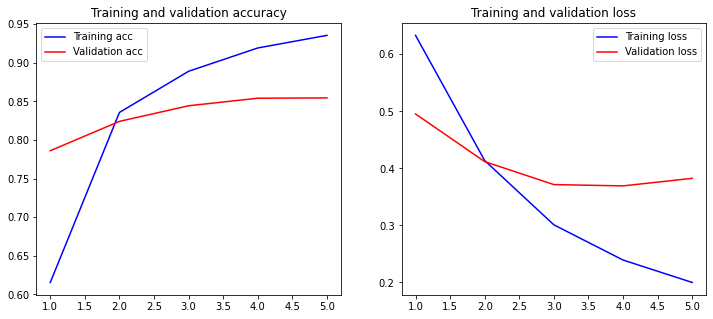

In [ ]:
plot_history(history)

#**BOF** , Tfidf , NN With Out Hashtags (Binary Data)

In [ ]:
normlize_tweet1=normlize_tweet.apply(remove_hashtags)


In [ ]:
sentences_train, sentences_test, y_train, y_test=split(normlize_tweet1,binray_Sentiment)
X_train_bag, X_test_bag = bow_features(sentences_train, sentences_test)
X_train_tfidf, X_test_tfidf = tfidf_features(sentences_train, sentences_test)

In [ ]:
classifier_bag = classifierbow(X_train_bag, y_train,y_test,X_test_bag)
classifier_tfidf = classifiertfidf(X_train_tfidf, y_train,y_test,X_test_tfidf)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print('Bag-of-words Accuracy: '+ str(classifier_bag) )
print('Tfidf Accuracy: ' + str(classifier_tfidf) )

Bag-of-words Accuracy: 0.873340509508432
Tfidf Accuracy: 0.8540844396603278


In [ ]:
sentences_train, sentences_test, y_train, y_test=split(normlize_tweet1,binray_Sentiment)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 50
maxlen = 100
n_timesteps = 10
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen ))
model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(n_timesteps, 1)))
model.add(layers.MaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history=model.fit(X_train,y_train,epochs=5,verbose=1,validation_data=(X_test, y_test),batch_size=256)
loss,score = model.evaluate(X_train, y_train, verbose=False)
print("score:{:.4f}".format(score))
loss,score = model.evaluate(X_test, y_test, verbose=False)
print("score:{:.4f}".format(score))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           1808850   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 32)            8032      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 96, 40)            8480      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 48, 40)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 48, 1)             41        
Total params: 1,825,403
Trainable params: 1,825,403
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
98/98 [==============================] - 24s 209ms/step - loss: 0.6835 - accuracy: 0.5470 - val_loss

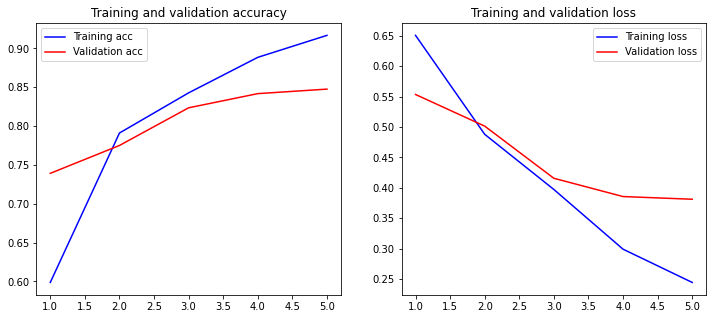

In [ ]:
plot_history(history)


#BOF , tfidf ,NN without Full Hashtags sentens (Binary Data)

In [ ]:
normlize_tweet2=normlize_tweet.apply(remove_fullhashtags)

In [ ]:
sentences_train, sentences_test, y_train, y_test=split(normlize_tweet2,binray_Sentiment)
X_train_bag, X_test_bag = bow_features(sentences_train, sentences_test)
X_train_tfidf, X_test_tfidf = tfidf_features(sentences_train, sentences_test)

In [ ]:
classifier_bag = classifierbow(X_train_bag, y_train,y_test,X_test_bag)
classifier_tfidf = classifiertfidf(X_train_tfidf, y_train,y_test,X_test_tfidf)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print('Bag-of-words Accuracy: '+ str(classifier_bag) )
print('Tfidf Accuracy: ' + str(classifier_tfidf) )

Bag-of-words Accuracy: 0.8809950962803492
Tfidf Accuracy: 0.8610214089223777


In [ ]:
sentences_train, sentences_test, y_train, y_test=split(normlize_tweet2,binray_Sentiment)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 50
maxlen = 100
n_timesteps = 10
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen ))
model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(n_timesteps, 1)))
model.add(layers.MaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history=model.fit(X_train,y_train,epochs=5,verbose=1,validation_data=(X_test, y_test),batch_size=256)
loss,score = model.evaluate(X_train, y_train, verbose=False)
print("score:{:.4f}".format(score))
loss,score = model.evaluate(X_test, y_test, verbose=False)
print("score:{:.4f}".format(score))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           1416250   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 96, 32)            8032      
_________________________________________________________________
bidirectional_2 (Bidirection (None, 96, 40)            8480      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 48, 40)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 48, 1)             41        
Total params: 1,432,803
Trainable params: 1,432,803
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
98/98 [==============================] - 23s 206ms/step - loss: 0.6801 - accuracy: 0.5452 - val_loss

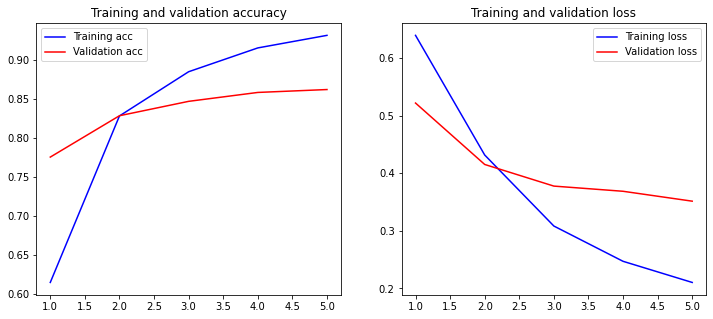

In [ ]:
plot_history(history)

#*Bof* , tfidf , NN Without fullhash (Full Data)

In [ ]:
tweets=tweets.apply(remove_fullhashtags)


In [ ]:
sentences_train, sentences_test, y_train, y_test=split(tweets,nSentiment)
X_train_bag, X_test_bag = bow_features(sentences_train, sentences_test)
X_train_tfidf, X_test_tfidf = tfidf_features(sentences_train, sentences_test)

In [ ]:
classifier_bag = classifierbow(X_train_bag, y_train,y_test,X_test_bag)
classifier_tfidf = classifiertfidf(X_train_tfidf, y_train,y_test,X_test_tfidf)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print('Bag-of-words Accuracy: '+ str(classifier_bag) )
print('Tfidf Accuracy: ' + str(classifier_tfidf) )

Bag-of-words Accuracy: 0.6341107871720116
Tfidf Accuracy: 0.5486880466472304


In [ ]:
sentences_train, sentences_test, y_train, y_test=split(tweets,nSentiment)

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 50
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


this model and tokenize saved for evaluate 

In [ ]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen ))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Bidirectional(LSTM(10, return_sequences=True), input_shape=(n_timesteps, 1)))
model.add(layers.GlobalMaxPooling1D())
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
history=model.fit(X_train,y_train,epochs=5,verbose=1,validation_data=(X_test, y_test),batch_size=256)
model.save('my_model')
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
loss,score = model.evaluate(X_train, y_train, verbose=False)
print("score:{:.4f}".format(score))
loss,score = model.evaluate(X_test, y_test, verbose=False)
print("score:{:.4f}".format(score))


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 50)           1562250   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 100, 32)           4832      
_________________________________________________________________
bidirectional_3 (Bidirection (None, 100, 20)           3440      
_________________________________________________________________
global_max_pooling1d (Global (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 105       
Total params: 1,570,627
Trainable params: 1,570,627
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
121/121 [==============================] - 22s 157ms/step - loss: 1.5661 - accuracy: 0.2845 - val_lo

INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


score:0.8127
score:0.7173


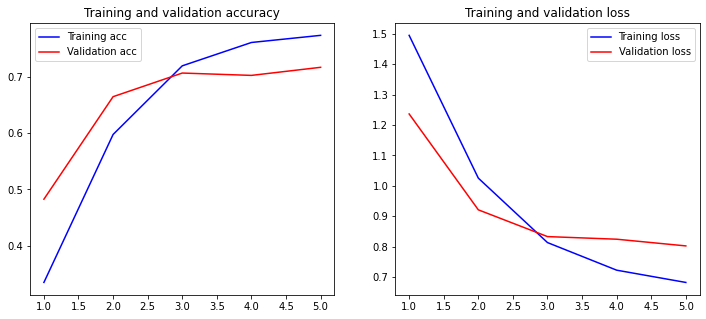

In [ ]:
plot_history(history)

#Final Code
after testing the best data has been with out hashtags sentains 
so i make the testing result function based on that model 



In [ ]:
def testing_result(url):
  df = pd.read_csv(url,encoding='latin1')
  df.head()
  df['OriginalTweet']=df.OriginalTweet.apply(text_clean)
  df['normlize_tweet']=df.OriginalTweet.apply(toknize)
  df['normlize_tweet']=df.normlize_tweet.apply(lambda x: remove_stop(x))
  df['normlize_tweet']=df.normlize_tweet.apply(lambda x: lemmatize_text(x))
  le=LabelEncoder()
  df["nSentiment"]=df["Sentiment"]
  df["nSentiment"]=le.fit_transform(df["nSentiment"])
  nSentiment=df["nSentiment"]
  tweets=df.normlize_tweet.apply(listtostring)
  tweets=tweets.apply(remove_fullhashtags)
  reconstructed_model = keras.models.load_model("my_model")
  with open('tokenizer.pickle', 'rb') as handle:
      tokenizer = pickle.load(handle)
  X_test = tokenizer.texts_to_sequences(tweets.values)
  Y_test = nSentiment.values
  vocab_size = len(tokenizer.word_index) + 1
  embedding_dim = 50
  maxlen = 100
  X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
  loss,score = reconstructed_model.evaluate(X_test, Y_test, verbose=True)
  print("score:{:.4f}".format(score))

#test result function


In [ ]:
testing_result('https://raw.githubusercontent.com/ashraf97it/NLPHW2/main/Covid_19_tweets_train.csv')

1287/1287 [==============================] - 16s 12ms/step - loss: 0.6587 - accuracy: 0.7889
score:0.7889


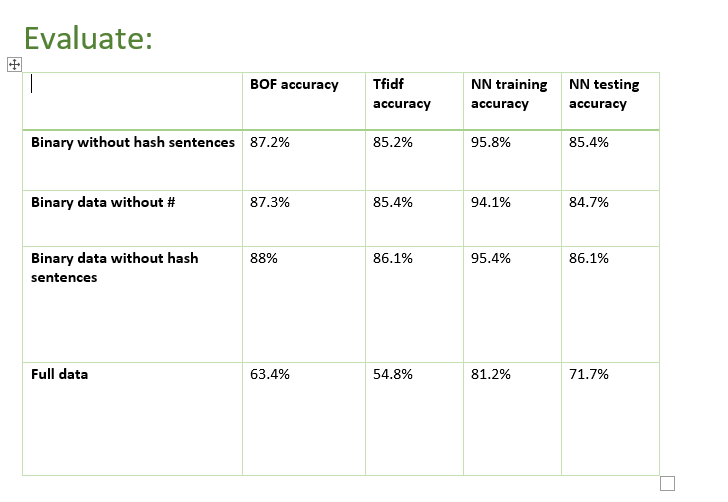